In [1]:
import pandas as pd

df = pd.read_csv('C:\Users\user\Desktop\workspace\Dataset 10.21\products_dns_sorted.csv').dropna()
size = len(df)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

cnt_vec = CountVectorizer(max_features=1000)

desc = df['description'][::20]
trainY = df['category_id'][::20]
trainX = cnt_vec.fit_transform(desc)

In [3]:
descT = df['description'][2::20]
testY = df['category_id'][2::20]

testX = cnt_vec.transform(descT)

In [4]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier().fit(trainX, trainY)

print("{0:.4f}".format(forest.score(trainX, trainY)))
print("{0:.4f}".format(forest.score(testX, testY)))

0.9401
0.8056


In [5]:
df1 = pd.read_csv('C:\Users\user\Desktop\workspace\Dataset 10.21\opponents_to_dns_products_250k.csv').dropna()

In [6]:
from sklearn.decomposition import PCA

trainXmrx = trainX.toarray()

pca = PCA(n_components=2)
pca.fit(trainXmrx)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [7]:
p = pca.transform(trainXmrx)

In [8]:
p

array([[-0.0945193 , -0.03943578],
       [-0.0845851 , -0.01357821],
       [-0.06669385,  0.03222638],
       ...,
       [-0.28946834, -0.52610443],
       [-0.0635208 ,  0.03157996],
       [-0.0722429 ,  0.03298973]])

In [9]:
import matplotlib.pyplot as plt
import numpy as np

%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\user\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['size']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


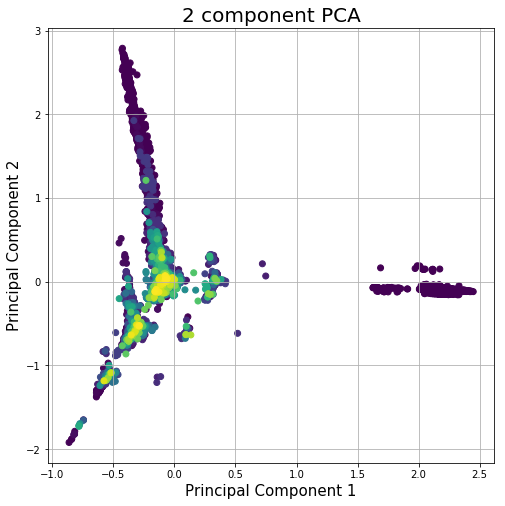

In [10]:
label = pd.Categorical(trainY, categories=trainY.unique()).codes

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
plt.scatter(p[:, 0], p[:, 1], c=label)
ax.grid()

In [11]:
trainY[p[:, 1] > 2][:10] # по y > 2

72456    B24E00155D030B1F11E270E6F5145BFB
72476    B24E00155D030B1F11E270E6F5145BFB
72496    B24E00155D030B1F11E270E6F5145BFB
72556    B24E00155D030B1F11E270E6F5145BFB
73016    B24E00155D030B1F11E270E6F5145BFB
73056    B24E00155D030B1F11E270E6F5145BFB
73076    B24E00155D030B1F11E270E6F5145BFB
73096    B24E00155D030B1F11E270E6F5145BFB
73116    B24E00155D030B1F11E270E6F5145BFB
73136    B24E00155D030B1F11E270E6F5145BFB
Name: category_id, dtype: object

In [12]:
trainY[p[:, 0] > 1.5][:10] # по x > 1.5

120    B24E00155D030B1F11E270E6F5145C0B
140    B24E00155D030B1F11E270E6F5145C0B
160    B24E00155D030B1F11E270E6F5145C0B
180    B24E00155D030B1F11E270E6F5145C0B
200    B24E00155D030B1F11E270E6F5145C0B
220    B24E00155D030B1F11E270E6F5145C0B
240    B24E00155D030B1F11E270E6F5145C0B
260    B24E00155D030B1F11E270E6F5145C0B
280    B24E00155D030B1F11E270E6F5145C0B
300    B24E00155D030B1F11E270E6F5145C0B
Name: category_id, dtype: object

In [13]:
trainXmrx = trainX.toarray()

pca3d = PCA(n_components=3)
pca3d.fit(trainXmrx)

p3d = pca3d.transform(trainXmrx)

In [14]:
p3d

array([[-0.09451932, -0.03943525,  0.45917991],
       [-0.08458534, -0.01357786,  0.44133604],
       [-0.06669387,  0.03222665,  0.22116058],
       ...,
       [-0.28946832, -0.52610453, -0.47877524],
       [-0.06352077,  0.03158012,  0.19528964],
       [-0.07224287,  0.03298944,  0.18931009]])

C:\Users\user\Anaconda2\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


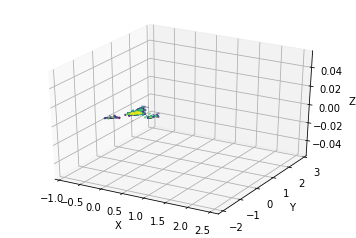

In [15]:
from mpl_toolkits.mplot3d import Axes3D

label = pd.Categorical(trainY, categories=trainY.unique()).codes

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.scatter(p3d[:, 0], p3d[:, 1], p3d[:, 2], c=label)

In [16]:
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer

cnt_vecc = CountVectorizer(max_features=1000)

descc = df['description'][:100000:500]
trainYc = df['category_id'][:100000:500]
trainXc = cnt_vecc.fit_transform(descc)

trainXc.shape

(200, 931)

In [17]:
tsne = TSNE(n_components=2)
ts = tsne.fit_transform(trainXc.toarray())

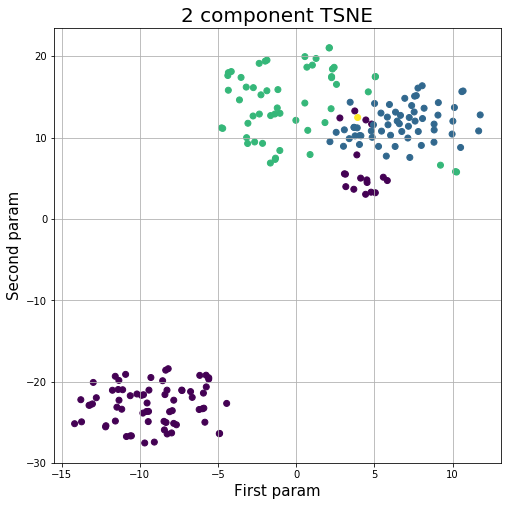

In [18]:
label = pd.Categorical(trainYc, categories=trainYc.unique()).codes

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('First param', fontsize = 15)
ax.set_ylabel('Second param', fontsize = 15)
ax.set_title('2 component TSNE', fontsize = 20)
plt.scatter(ts[:, 0], ts[:, 1], c=label)
ax.grid()

In [22]:
tsne3d = TSNE(n_components=3)
ts3d = tsne3d.fit_transform(trainXc.toarray())

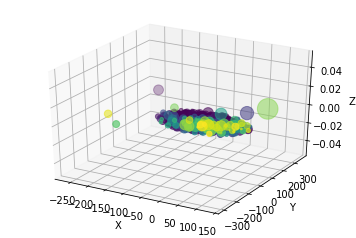

In [23]:
from mpl_toolkits.mplot3d import Axes3D

label = pd.Categorical(trainYc, categories=trainYc.unique()).codes

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.scatter(ts3d[:, 0], ts3d[:, 1], ts3d[:, 2], c=label)

In [28]:
from sklearn.manifold import TSNE

cnt_vecc = CountVectorizer(max_features=1000)

descc1 = df['description'][:100000:250]
trainYc1 = df['category_id'][:100000:250]
trainXc1 = cnt_vecc.fit_transform(descc1)

trainXc1.shape

(400, 1000)

In [30]:
import gensim

C:\Users\user\Anaconda2\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [31]:
warnings.warn("hello")

C:\Users\user\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: UserWarning: hello
  """Entry point for launching an IPython kernel.


# TSIDF vectorizer

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np

%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\user\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['size']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [12]:
tfidf_vec = TfidfVectorizer(max_features=1000)

desc = df['description'][:100000:500]
trainY = df['category_id'][:100000:500]
trainX = tfidf_vec.fit_transform(desc)

In [13]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
ts = tsne.fit_transform(trainX.toarray())

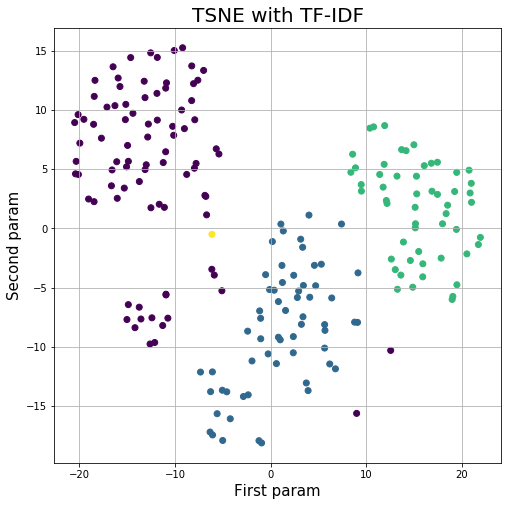

In [14]:
label = pd.Categorical(trainY, categories=trainY.unique()).codes

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('First param', fontsize = 15)
ax.set_ylabel('Second param', fontsize = 15)
ax.set_title('TSNE with TF-IDF', fontsize = 20)
plt.scatter(ts[:, 0], ts[:, 1], c=label)
ax.grid()

# word2vec

In [54]:
from gensim.models import Word2Vec

### little python examples

In [35]:
desc = df['description'][:100000:50]
trainY = df['category_id'][:100000:50]
trainX = tfidf_vec.fit_transform(desc)

In [36]:
desc.shape

(2000L,)

In [48]:
import re
words = [[b.lower() for b in x.split() if re.search("\d", b) is None and len(b) > 1] for x in desc]

In [49]:
print(words[0][0])

Зеркало


In [55]:
model = Word2Vec(words, size=100, min_count=1, window=5, workers=4)

In [79]:
model.wv.vocab

{'\xd0\x9f\xd0\x90\xd0\x9d\xd0\x95\xd0\x9b\xd0\xac': <gensim.models.keyedvectors.Vocab at 0x12319da0>,
 'nws': <gensim.models.keyedvectors.Vocab at 0x12319e80>,
 'saver': <gensim.models.keyedvectors.Vocab at 0x12b48908>,
 'dynamic': <gensim.models.keyedvectors.Vocab at 0x12b488d0>,
 'yellow': <gensim.models.keyedvectors.Vocab at 0x12b48a20>,
 '\xd0\xbd\xd0\xb0\xd0\xb4\xd0\xbf\xd0\xb8\xd1\x81\xd1\x8f\xd0\xbc\xd0\xb8)': <gensim.models.keyedvectors.Vocab at 0x12b489b0>,
 '\xd0\x92\xd1\x81\xd0\xbf\xd1\x8b\xd1\x88\xd0\xba\xd0\xb0': <gensim.models.keyedvectors.Vocab at 0x12b487b8>,
 '\xd0\xba\xd0\xbe\xd0\xbd\xd0\xb4\xd0\xb8\xd1\x86\xd0\xb8\xd0\xbe\xd0\xbd\xd0\xb5\xd1\x80\xd0\xb0': <gensim.models.keyedvectors.Vocab at 0x12b48780>,
 '\xd1\x82\xd0\xb5\xd1\x80\xd0\xbc\xd0\xbe\xd0\xbf\xd1\x80\xd0\xb5\xd0\xb4\xd0\xbe\xd1\x85\xd1\x80\xd0\xb0\xd0\xbd\xd0\xb8\xd1\x82\xd0\xb5\xd0\xbb\xd0\xb5\xd0\xbc': <gensim.models.keyedvectors.Vocab at 0x12adfb00>,
 '\xd0\xbe\xd1\x82\xd1\x80\xd0\xb8\xd1\x86\xd0\xb0\

In [72]:
for x in model.wv.vocab.keys(): print(x)

ПАНЕЛЬ
nws
saver
dynamic
yellow
надписями)
Вспышка
кондиционера
термопредохранителем
отрицательных
Петля
БОКОВАЯ
dell
jack
sshd/nv
lumia
(термостата)
parrot
Основная
fhd
venue
samurai
red
airtab
vivobook
фиолетовый;
Грация
Автомобильный
sjcam
(xga)
плеера
(control
(subpcb-mb
Мулен
vitek
liberty
eco
gl;
(r)
meizu
new
hero
Решетка
штора
ind.)
studio
kugel
usb-
light)
hansa
rafting
голову
Экранный
county
Фронтальная
language/bt
духового
Чоппер
русифицирована)
Вольтер
dns
bfgoodrich
thinkpad
lotus;
Экшн-видеокамеры
(декоративная
Магнум
mg
mb
blade
mw
stadt
conticrosscontact
экран
(заглушка
ЗУ
графит
Рассекатель
titanium
orion
nitto
sim/tf)
колодки
elitebook
eng
sata
gaming
roverbook
моноблока
dvd±rw
Парадиз
Излучатель
Дисковые
president
dtm-one
gefest
Свеча
vanco
green
oysters
wind
highscreen
дверцы
Сочи
(фронт
Дно
Иллюзио
venti
Видеосвидетель
Термодатчик
[office]
(plum)
Туфли
(volume)
Фобос
slate
вибромотором;
экрана
(usb
silver
alex
Сиеста
hqq
Селена-супер
мытья
hotpoint-ariston
voyager


привет


In [78]:
n = u'\u041f\u0410\u041d\u0415\u041b\u042c'
n.encode("utf8").decode("utf8")

u'\u041f\u0410\u041d\u0415\u041b\u042c'

In [90]:
for i in model.wv.similar_by_word("телефон"): print(i[0])

ИБП
(крышка
nokia
lenovo
galaxy
зажигания
core
matt
Плата
крышка)
